# Exploratory Data Analysis With Python

We'll be using this [Jupyter Notebook](https://jupyter.org/) to illustrate some tasks in [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) and how to do them with Python, Pandas, and Seaborn. The first thing we want to do is acquire our data. For all EDA example, we'll be using the [SOCR Data Dinov 020108 HeightsWeights](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) dataset of 10,000 records of human heights (in inches) and weights (lbs). It has 5,000 male and 5,000 female records. The dataset is a CSV file which is stored in this folder (`cmsc_291/examples/lecture_10/notebooks/weight-height.csv`) and has three columns:

* "Gender" (or more accurately, sex, a categorical variable that is either "male" or "Female")
* "Height" a float value, height in inches
* "Weight" a float value, weight in lbs

The first row contains these three column names.

Let's start by loading the dataset into a pandas DataFrame:

In [1]:
import pandas

data_frame = pandas.read_csv("weight-height.csv", header=0)  # Tell pandas that the header is in the first row
data_frame

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


Pandas has created a dataframe with three columns (using the header row to name the columns). It has created an index which we see on the left of the DataFrame. Since we didn't tell it to use a CSV column as it's index, it's generated its own index using the row number. Unless you tell it not to, Pandas will also try to infer the type of the data. We can see what it's inferred:

In [2]:
data_frame.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

"object" is Panda's term for string data. It's correctly inferred that height and weight are floats, so that's one less thing we have to do! Let's do some simple manipulation, including:
1. extracting single columns as a Pandas [series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) 
2. filtering rows by a constant or by a column value
3. converting inches to feet:

In [3]:

#filtered_data_frame = data_frame[(data_frame.Weight > 150) & (data_frame.Gender == "Female")]
#data_frame["Height (feet)"] = data_frame.Height / 12
#data_frame = data_frame.drop(columns=["Height"], inplace=False)
#data_frame.iloc[2:10]

## Descriptive Statistics

Let's generate Tukey's "[five-number survey](https://en.wikipedia.org/wiki/Five-number_summary)", which consists of:

1. the sample minimum (smallest observation)
2. the lower quartile or first quartile (i.e. where is the "center' of the *lower half* of the data)
3. the median (the middle value)
4. the upper quartile or third quartile (i.e. where is the "center' of the *upper half* of the data)
5. the sample maximum (largest observation)

Together these tell us the center (#3), the range (#1 and #5) and the spread (#2 and #4) of our data. They are non-parametric (unlike mean, stdev, and variance for example) so they are safe to use even if we don't know the distribution,


In [4]:
data_frame.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
# Summary gives us the mean, bu we want the median:
data_frame.median()

Height     66.318070
Weight    161.212928
dtype: float64

Does the category (male/female) effect measures of central tendency?

In [6]:
print(data_frame[data_frame.Gender == "Male"].median())
print(data_frame[data_frame.Gender == "Female"].median())

Height     69.027709
Weight    187.033546
dtype: float64
Height     63.730924
Weight    136.117583
dtype: float64


## Univariate Data Visualization

Descriptive statistics are nice, but [they can be misleading](https://mazelife.github.io/cmsc-291/llecture_10.html#anscombe). We should visualize the data. Let's start by picking one variable (weight) and looking at the distributions of values witihn it. We'll start with the histogram, a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar.

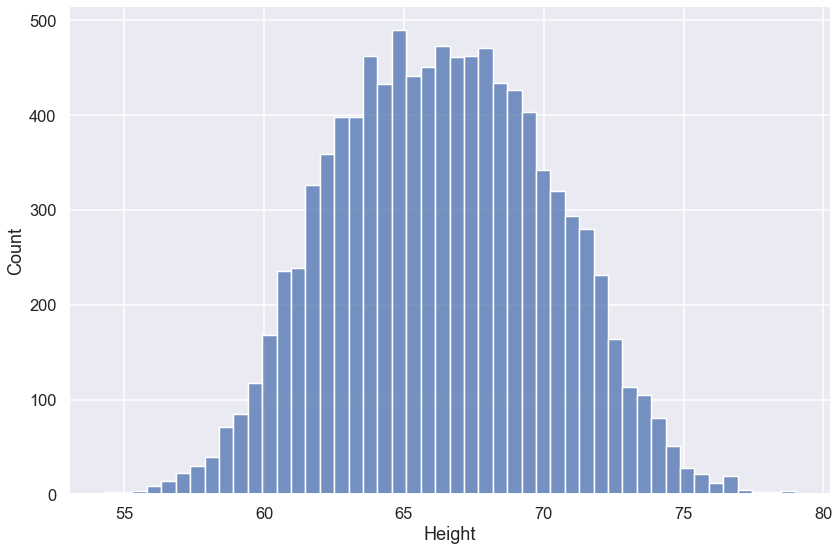

In [7]:
# We'll use seaborn for this:
import seaborn

# Seaborn has various themes/styles. We'll pick a good default:
seaborn.set_theme(style="darkgrid")
seaborn.set_context("talk")

# Seaborn understands what to do with a Pandas dataframe. 
# We just need to give it the name of the column to use:
seaborn.displot(data_frame, x="Height", height=8, aspect=1.5)

That shape is kind of odd isn't it? What is causing those two separate peaks in our data?

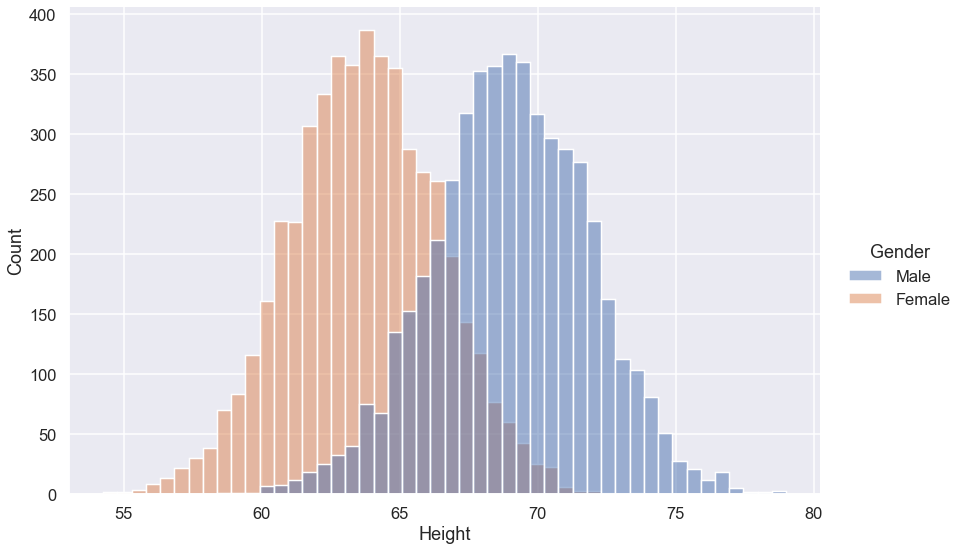

In [8]:
# If we want to plot our categories separately in the same chart using color?
# Seaborn can do this for us! We just need to give it the name of the column to use:
seaborn.displot(data_frame, x="Height", hue="Gender", height=8, aspect=1.5)

Another common univariate plot to use in EDA is the [boxplot](https://en.wikipedia.org/wiki/Box_plot). Box plots provide a more information-dense way of displaying info about a univariate dataset, and give us:

1. Minimum and maximum (excluding outliers)
2. Median
3. First and thirs quartile median
4. Any outliers (above or below 1.5 [IQRs](https://en.wikipedia.org/wiki/Interquartile_range))

We can create this easily too:

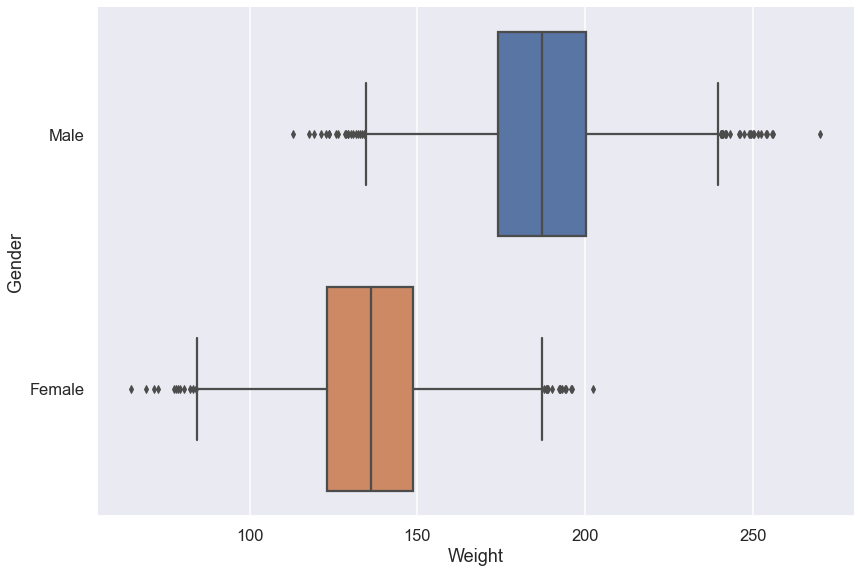

In [9]:
seaborn.catplot(x="Weight", y="Gender", kind="box", data=data_frame, height=8, aspect=1.5)


For women:
* Median is 137 lbs
* About 25% weigh above 150 lbs
* About 25% weigh below 125 lbs
* 99% of women are between 70 and 190 lbs

## Is human height normally distributed?

A probability distribution is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range. There are many distributions, but one of the most common is the "normal distribution". In this distribution data data tends to be centered around a central value with no bias left or right. The shape of this distribution is called a bell-curve.

Plotting data in a historgram might reveal a bell-curve-like shape that _suggests_ the data is normally distributed, but there's a special kind of plot that is more conclusive: the [normal probability plot](https://www.itl.nist.gov/div898/handbook/eda/section3/normprpl.htm). 
Here we use an extra Python package called [probscale](https://matplotlib.org/mpl-probscale/index.html) to create this plot.


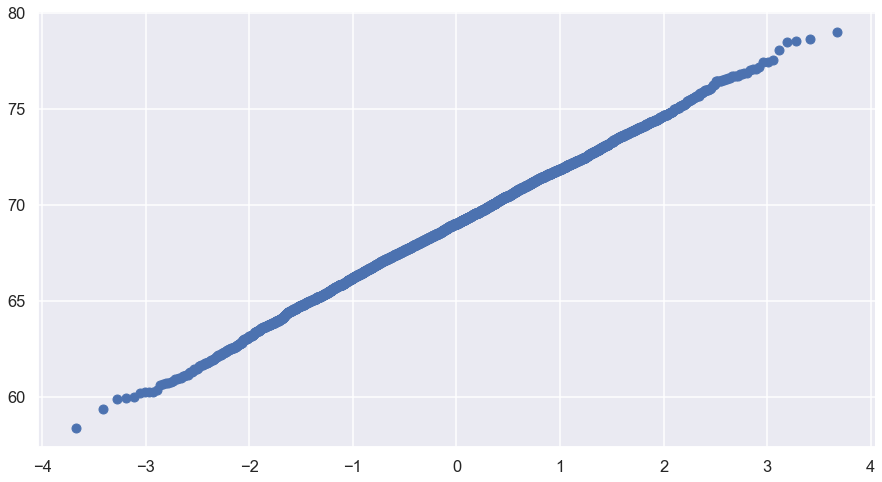

In [10]:
import probscale
from matplotlib import pyplot
from scipy.stats import norm

fig, ax = pyplot.subplots(figsize=(15, 8))
probscale.probplot(data_frame[data_frame.Gender == "Male"].Height, ax=ax, dist=norm, plottype='qq', height=8, aspect=1.5)
seaborn.despine()


![In humans, height follows a normal distribution](height-distribution.png)

## Multivariate Data Visualization

A big part of statistical analysis is understanding how variables in a dataset relate to each other. In this case: how do height and weight relate to each other? Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

A simple but very useful way to do this in exploratory data anlysis is to create a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). 

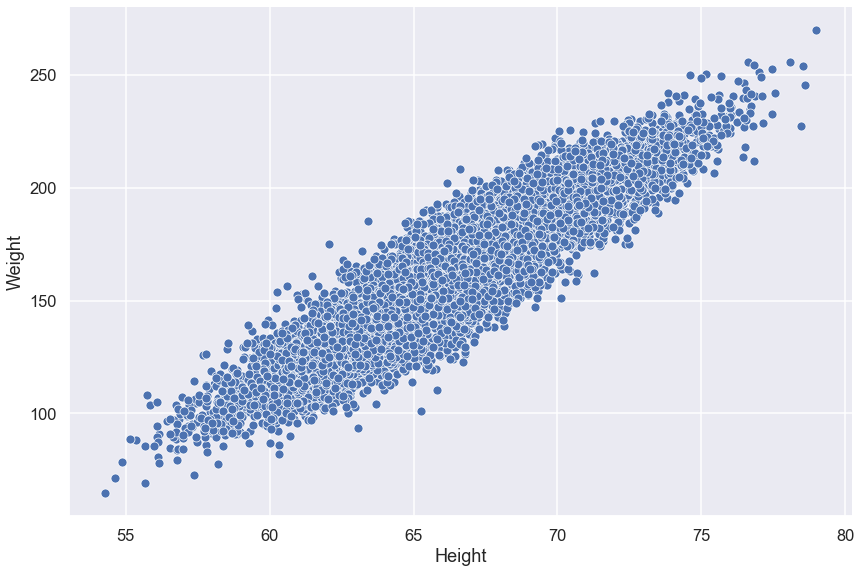

In [11]:
seaborn.relplot(x="Height", y="Weight", data=data_frame, height=8, aspect=1.5);

As before, it might be useful to use color to distinguish categories:

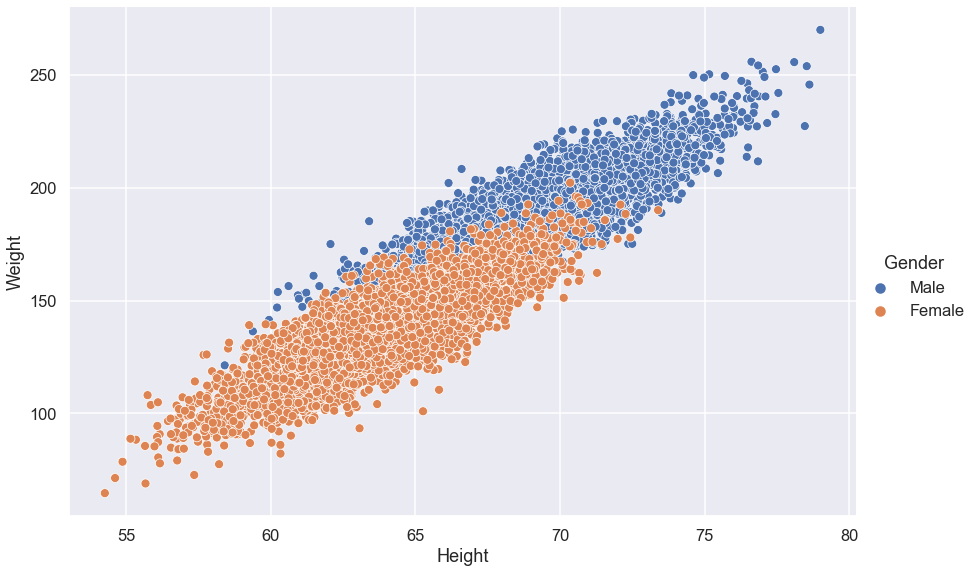

In [12]:
seaborn.relplot(x="Height", y="Weight", hue="Gender", data=data_frame, height=8, aspect=1.5);

# Linear Regression

Although it starts to go beyond exploratory data analysis, we can even have seaborn create and visualize a linear regression model for us, plotting a best-fit line that minimizes the error using a [least-squares](https://en.wikipedia.org/wiki/Least_squares) approach. To keep things simple, let's just do linear regression for a single category: women

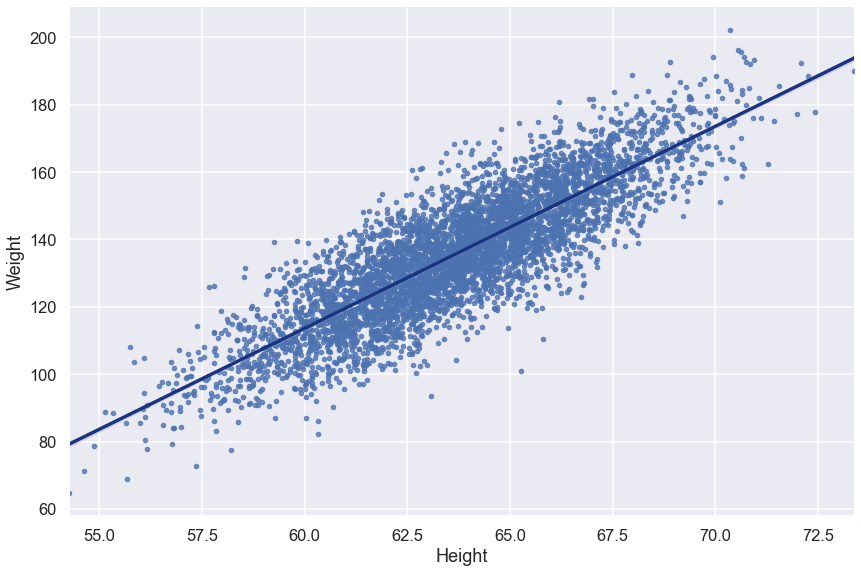

In [13]:
plt = seaborn.lmplot(x="Height", 
                     y="Weight", 
                     data=data_frame[data_frame.Gender == "Female"],
                     markers=".",
                     line_kws={"color": (0.1, 0.2, 0.5)},
                     height=8, 
                     aspect=1.5)

One limitation of Seaborn is that if you are interested in getting the exact regression coefficients for your line, it's up to you do do that. If we had the coordinates of two point laying on the line, we could do this ourselves.

Remember the formula for slope is:

$$m = \frac{y_2 - y_1}{x_2 - x_1}$$

And the formula for intercept is:

$$b = y_1 - mx_1$$

Knowing slope and intercept, we can predict weight from a given height:

$$y = mx + b$$

Here's some code that will take the plot object produced by the `seaborn.lmplot` function, extract the line object from it, pick two points that line on the line, and give you the regression coefficients (slope and intercept)


In [14]:

def get_regression_coefficients(plot):
    line = plt.ax.get_lines()[0]  # Get the first (and only) line from the plot.
    start_x, start_y = (line.get_xdata()[0], line.get_ydata()[0])
    end_x, end_y = (line.get_xdata()[-1], line.get_ydata()[-1])
    slope = (end_y - start_y) / (end_x - start_x)
    intercept = start_y - (slope * start_x)
    return slope, intercept


def predict_weight_from_height(height, slope, intercept):
    return slope * height + intercept


slope, intercept = get_regression_coefficients(plt)
print(f"Slope is {slope} and intercept is {intercept}.")
pred_weight = predict_weight_from_height(5 * 12 + 10, slope, intercept)
print(f"Predicted weight for a person that is 5'10\" is {pred_weight}.")

Slope is 5.99404661485449 and intercept is -246.0132657466726.
Predicted weight for a person that is 5'10" is 173.5699972931417.
